На этом шаге детально рассмотрим из чего состоит сверточный слой.

Сверточный слой это массив фильтров.

Каждый фильтр имеет следующую размерность:

- число слоев во входном изображении (для RGB это 3)

- высота фильтра

- ширина фильтра

В ядре (кернеле) все фильтры имеют одинаковые размерность, поэтому ширину и высоту фильтров называют шириной и высотой ядра. Чаще всего ширина ядра равна высоте ядра, в таком случае их называют размером ядра (kernel_size).

 

Также слой имеет такие параметры:

- padding - на какое количество пикселей увеличивать входное изображение с каждой стороны.

- stride - на сколько пикселей смещается фильтр при вычислении свертки

 

Попробуйте самостоятельно вывести формулу размерности выхода сверточного слоя, зная параметры входа и ядра. 

Правильность формулы проверьте, сравнив ее с формулой из документации.

 

Чтобы убедиться в правильности вашей формулы, напишите функцию, принимающую на вход:

- входную размерность (число изображений в батче*число слоев в одном изображении*высота изображения*ширина изображения)

- количество фильтров

- размер фильтров (считаем, что высота совпадает с шириной)

- padding

- stride

Функция должна возвращать размерность выхода.

In [1]:
import numpy as np

input_matrix_shape=[2, 3, 10, 10] :
- первый элемент - это количество входных изображений
- второй элемент - количество слоев входного изображения
- высота
- ширина

На выходе функции calc_out_shape надо получить тоже матрицу с четырьмя элементами. Соответственно, первый элемент в ней совпадает с первым элементом input_matrix_shape, второй элемент задается out_channels, а третий и четвертый это высота и ширина преобразованного изображения, которые в нашей задаче совпадают (видимо, для упрощения задания).

,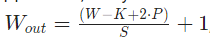 где W_out -- ширина выходного изображения, K -- размер свёртки, P -- размер паддинга, S -- размер страйда.

Когда делим на stride, не забываем про целочисленное деление.

In [4]:
def calc_out_shape(input_matrix_shape, out_channels, kernel_size, stride, padding):
    n = input_matrix_shape[0]
    c_in = input_matrix_shape[1]
    h_in = input_matrix_shape[2]
    w_in = input_matrix_shape[3]
    w_out = ((w_in - kernel_size + 2 * padding)//stride) + 1
    h_out = ((h_in - kernel_size + 2 * padding)//stride) + 1
    out_shape = (n,out_channels,h_out,w_out)# напишите тут код, вычисляющий выходную размерность

    return out_shape

print(np.array_equal(
    calc_out_shape(input_matrix_shape=[2, 3, 10, 10],
                   out_channels=10,
                   kernel_size=3,
                   stride=1,
                   padding=0),
    [2, 10, 8, 8]))

# ... и ещё несколько подобных кейсов

True


In [20]:
print(calc_out_shape(input_matrix_shape=[3, 3, 28, 28],
                   out_channels=6,
                   kernel_size=1,
                   stride=4,
                   padding=0))

(3, 6, 7, 7)
